In [168]:
import pandas as pd
import numpy as np

In [169]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [170]:
sns.set(rc={'figure.figsize': (9, 6)})

In [171]:
events_data = pd.read_csv('event_data_train.csv')

In [172]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [173]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [174]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [175]:
events_data['day'] = events_data.date.dt.date

In [176]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<Axes: xlabel='day'>

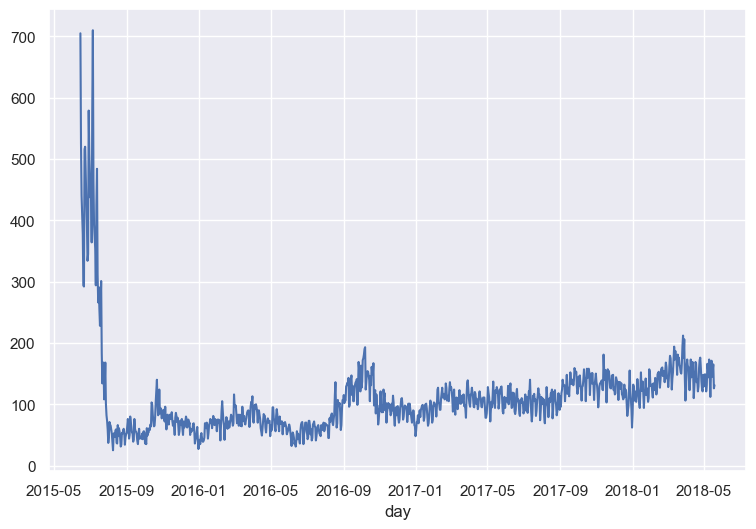

In [177]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [178]:
# events_data[events_data.action == 'passed'] \
# .groupby('user_id', as_index=False) \
# .agg({'step_id': 'count'}) \
# .rename(columns={'step_id': 'passed_steps'}).passed_steps.min()

In [179]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [180]:
users_events_data = events_data.pivot_table(index='user_id', columns='action', values='step_id', 
                        aggfunc='count', fill_value=0)\
    .reset_index()

In [181]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [182]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [183]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [184]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [185]:
users_scores = submissions_data.pivot_table(index='user_id',\
                        columns='submission_status', \
                        values='step_id', 
                        aggfunc='count', \
                        fill_value=0).reset_index()

In [186]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [187]:
gap_data = events_data[['user_id', 'day', 'timestamp']]\
    .drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp']\
    .apply(list).apply(np.diff).values

In [188]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [189]:
gap_data = gap_data / (24 * 60 * 60)

In [190]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<Axes: >

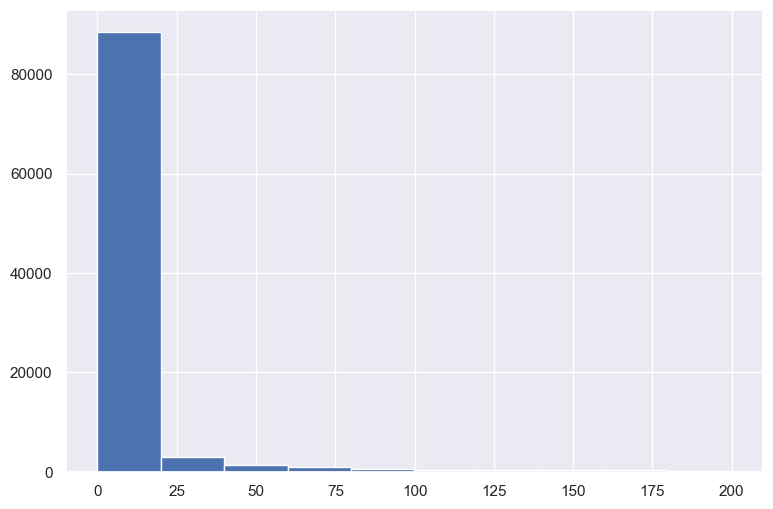

In [191]:
gap_data[gap_data < 200].hist()

In [192]:
gap_data.quantile(0.95)

59.760440972222156

In [193]:
users_scores[['user_id', 'correct']].sort_values(by='correct', axis=0, \
                                                 ascending=False)

submission_status,user_id,correct
439,1046,421
2099,5552,186
6415,17135,168
2344,6183,142
3208,8461,135
...,...,...
551,1321,0
9778,26349,0
3559,9422,0
5014,13408,0


In [194]:
users_data = events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [195]:
now = 1526772811
drop_out_theshhold = 2592000

In [196]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_theshhold

In [197]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [198]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [199]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [200]:
users_data = users_data.fillna(0)

In [201]:
users_data = users_data.merge(users_events_data, how='outer')

In [202]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [203]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [204]:
users_data = users_data.merge(users_days, how='outer')

In [205]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [206]:
users_data['passed_corse'] = users_data.passed > 170

In [207]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [208]:
1425 / 17809 *100

8.001572238755687

In [209]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [210]:
users_data = users_data.merge(user_min_time, how='outer')

In [211]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [212]:
events_data_train = pd.DataFrame()

In [213]:
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_thershold = min_user_time + 3 * 24 * 60 *60
    
#     users_events_data = events_data[(events_data.user_id == user_id) \
#                                     & (events_data.timestamp < time_thershold)]
#     events_data_train = events_data_train.append(users_events_data)

In [214]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [215]:
# events_data_train= events_data[events_data.user_id events_data.timestamp]

In [216]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [217]:
events_data.shape

(3480703, 7)

In [218]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [219]:
lerning_time_thershold = 3 * 24 * 60 *60
lerning_time_thershold

259200

In [220]:
user_lerning_time_thershold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + lerning_time_thershold).map(str)

In [221]:
user_min_time['user_lerning_time_thershold'] = user_lerning_time_thershold

In [222]:
events_data = events_data.merge(user_min_time[['user_id', 'user_lerning_time_thershold']], how='outer')

In [223]:
events_data.shape

(3480703, 8)

In [226]:
events_data_train = events_data[events_data.user_time <= events_data.user_lerning_time_thershold]

In [227]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_lerning_time_thershold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [229]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [235]:
submissions_data['user_time'] = submissions_data.user_id.map(str) + '_' +\
submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', \
                                                         'user_lerning_time_thershold']], how='outer')
submissions_data_train = submissions_data[submissions_data.user_time <= submissions_data.user_lerning_time_thershold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [268]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns = {'day': 'days'})

In [269]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns = {'steps_id': 'steps_tried'})

In [270]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [271]:
X.head()

,user_id,days,step_id
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [272]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',\
                        columns='submission_status', \
                        values='step_id', 
                        aggfunc='count', \
                        fill_value=0).reset_index())

In [273]:
X['correct_ratio']  = X.correct / (X.correct + X.wrong)

In [274]:
X

,user_id,days,step_id,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,23,27,0.460000
...,...,...,...,...,...,...
8908,26787,1,3,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,27,31,9,0.775000
8911,26797,1,2,2,0,1.000000


In [275]:
X = X.merge(events_data_train.pivot_table(index='user_id',\
                        columns='action', \
                        values='step_id', 
                        aggfunc='count', \
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [276]:
X = X.fillna(0)

In [277]:
X = X.merge(users_data[['user_id', 'passed_corse', 'is_gone_user']], how='outer')

In [278]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [279]:
y = X.passed_corse

In [280]:
X = X.drop(['passed_corse', 'is_gone_user'], axis=1)

In [282]:
X = X.set_index(X.user_id)

In [284]:
X = X.drop('user_id', axis=1)

In [285]:
X

,days,step_id,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...
26774,0.0,0.0,0.0,0.0,0.00,1
26781,0.0,0.0,0.0,0.0,0.00,6
26788,0.0,0.0,0.0,0.0,0.00,1
